In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

Count images per class

In [2]:
root = "../data/raw/"
classes = ["normal", "cyst", "tumor", "stone"]

for cls in classes:
    path = os.path.join(root, cls)
    print(cls, "=", len(os.listdir(path)))

normal = 5077
cyst = 3709
tumor = 2283
stone = 1377


Sample images from each class

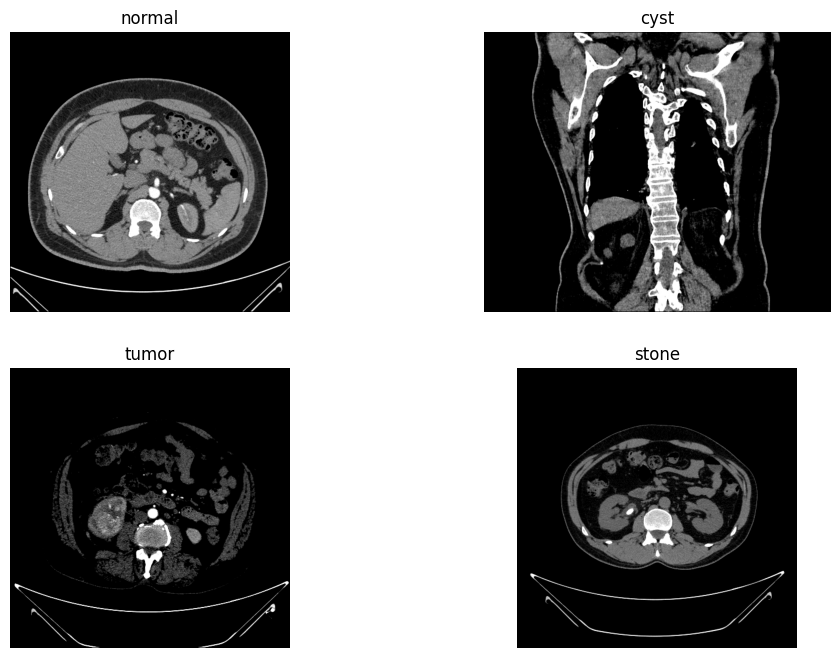

In [3]:
plt.figure(figsize=(12, 8))

i = 1
for cls in classes:
    folder = os.path.join(root, cls)
    img_path = os.path.join(folder, os.listdir(folder)[0])
    img = Image.open(img_path)

    plt.subplot(2, 2, i)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
    i += 1

plt.show()

Identifying corrupted files

In [4]:
shapes = []

for cls in classes:
    folder = os.path.join(root, cls)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        try:
            img = Image.open(img_path)
            shapes.append(img.size)
        except:
            print("Corrupted:", img_path)

Check image resolutions

In [5]:
print("Unique resolutions:", set(shapes))

Unique resolutions: {(813, 657), (1371, 1110), (622, 504), (867, 701), (1221, 988), (771, 623), (672, 544), (854, 691), (785, 634), (675, 545), (1167, 943), (838, 679), (778, 630), (779, 629), (687, 555), (832, 674), (701, 566), (754, 611), (882, 714), (1060, 858), (1152, 932), (682, 552), (768, 622), (804, 651), (713, 576), (1271, 1029), (731, 591), (1236, 1001), (781, 631), (697, 564), (868, 702), (861, 696), (855, 692), (680, 550), (588, 476), (813, 658), (746, 604), (838, 678), (764, 619), (892, 722), (790, 640), (796, 644), (749, 605), (840, 680), (1187, 961), (739, 597), (806, 653), (824, 667), (801, 647), (910, 737), (947, 765), (855, 691), (560, 560), (869, 702), (559, 451), (1203, 974), (705, 569), (758, 614), (1003, 811), (904, 732), (1118, 905), (808, 654), (512, 512), (730, 591), (865, 700), (652, 528), (755, 611), (798, 646), (791, 640), (809, 655), (845, 684), (888, 719), (787, 636), (847, 684), (745, 602), (828, 670), (660, 534)}


In [6]:
for cls in classes:
    folder = os.path.join(root, cls)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        try:
            img = Image.open(img_path)
            img.verify()
        except:
            print("Corrupted:", img_path)

Visualize class imbalance

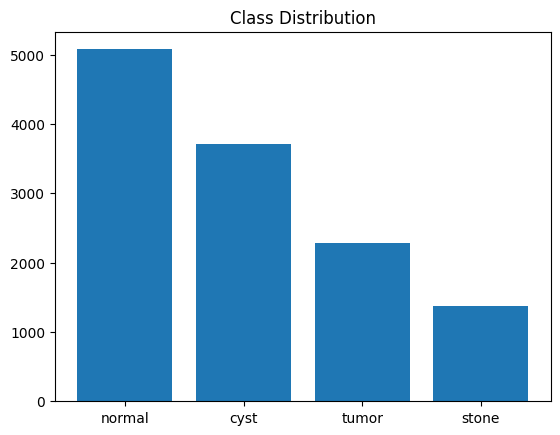

In [7]:
counts = [len(os.listdir(os.path.join(root, c))) for c in classes]

plt.bar(classes, counts)
plt.title("Class Distribution")
plt.show()